# Vector Pipeline

## Install Libraries

In [2]:
%pip install dill

Note: you may need to restart the kernel to use updated packages.


## Import Google Drive Files

In [3]:
import sys
sys.path.append('/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Code Files')
sys.path.append('/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Data')

## Import Libraries

In [4]:
#Import sklearn stuff
import datetime
import numpy as np

#Used to load data from pkl file
import dill

#Import External Files
from KFoldCV import KFoldCV_Vectorized
from train_test import TrainTest_Vectorized
from DataGenerationB import *

#plotting
import matplotlib.pyplot as plt

#preprocessing 
from sklearn.preprocessing import StandardScaler

## Import Data

In [9]:
import pickle

file= open("/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Data/Bounded_Var_Time:2024-04-15 19:35:40, intercept:5,n_train:5000, n_test:1000, tensor_dimensions:[32 32], tensor_mode_ranks:[4 4], separation_rank:2.pkl", 'rb')
data = pickle.load(file)
file.close()

X_train_Full = data[0]
print(data[0].shape)

Y_train_Full = data[1]
print(data[1].shape)

X_test_Full = data[2]
print(data[2].shape)

Y_test_Full = data[3]
print(data[3].shape)

B_tensored = data[4]
print(data[4].shape)

tensor_dimensions = np.array([32, 32])
tensor_mode_ranks = np.array([4, 4])
separation_rank = 2



(5000, 32, 32)
(5000,)
(1000, 32, 32)
(1000,)
(32, 32)


## Subset Data

In [10]:
n_train_all = [500,650,800,950,1100]
n_test = 400

## Vectorize Data

Number of Samples: 500 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [4.97839165 4.97277469 5.02654444 ... 5.02464395 4.98090313 5.01347675]
Train Intercept: 82.75112830801136
Fold = 0, Alpha = 0, NEE: 0.6961359338955887, NMSE: 0.03973061340545727, Correlation: 0.5002640479793404, R^2 Score: 0.14739041809311804,Objective Function Value: 16866.445720020085
Train Intercept: 82.74932022788956
Fold = 0, Alpha = 0.1, NEE: 0.6704592568327719, NMSE: 0.03203620817655487, Correlation: 0.6099614863217689, R^2 Score: 0.3125105373897281,Objective Function Value: 13622.904544192288
Train Intercept: 82.74929190643158
Fold = 0, Alpha = 0.3, NEE: 0.6705333575285003, NMSE: 0.03203379082034254, Correlation: 0.6099881303026501, R^2 Score: 0.3125624132832231,Objective Function Value: 13667.632907945765
Train Intercept: 82.74926364998628
Fold = 0, Alpha = 0.5, NEE: 0.6706074143089082

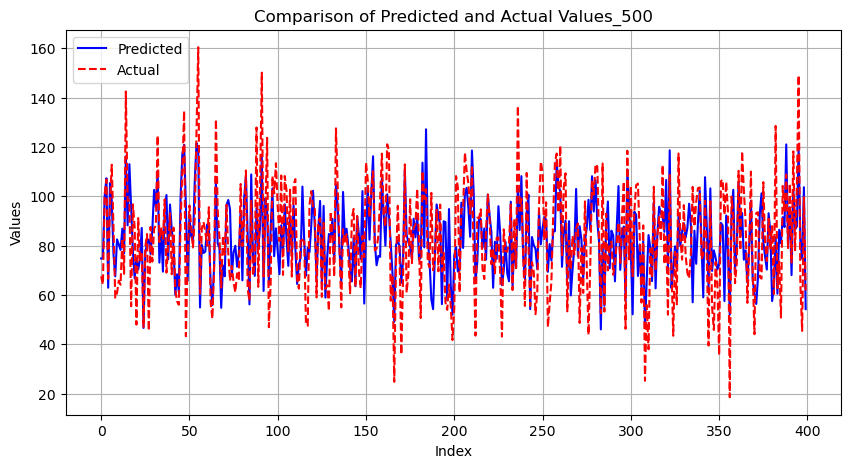

best_lamda: 2
Test Normalized Estimation Error: 0.6360359405032759
Test NMSE Loss: 0.03749824235651687
Test Correlation: 0.6547039902957322
Test R2 Score: 0.42657258599433434
Objective Function Value: 504.45330516929977
Number of Samples: 650 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [4.99871322 4.98420917 5.00873521 ... 5.01840176 4.98600789 5.01023623]
Train Intercept: 83.6945106907585
Fold = 0, Alpha = 0, NEE: 0.5641043320443033, NMSE: 0.029529219312616515, Correlation: 0.799929431515731, R^2 Score: 0.6200865718233444,Objective Function Value: 15456.202554912883
Train Intercept: 83.68090016357577
Fold = 0, Alpha = 0.1, NEE: 0.5549993447059401, NMSE: 0.02893111537308945, Correlation: 0.8097254610268333, R^2 Score: 0.6277815845382456,Objective Function Value: 15174.069375779074
Train Intercept: 83.68060179853757
Fold = 0, Alpha = 0.3, NEE: 0.5551534216341052

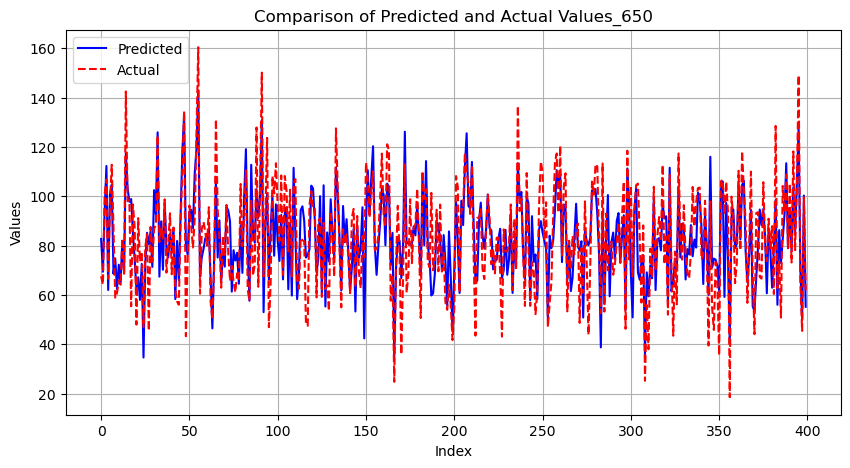

best_lamda: 5
Test Normalized Estimation Error: 0.5139189380396366
Test NMSE Loss: 0.02564387668178207
Test Correlation: 0.7797269419175226
Test R2 Score: 0.6078509026928058
Objective Function Value: 1681.221754786654
Number of Samples: 800 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [4.98847323 4.99603854 5.01064206 ... 5.01434698 4.99303093 5.01147906]
Train Intercept: 83.43357202376116
Fold = 0, Alpha = 0, NEE: 0.4680188012156338, NMSE: 0.02725968818392914, Correlation: 0.8155900989919327, R^2 Score: 0.6455395195546192,Objective Function Value: 14731.477631473841
Train Intercept: 83.4547139308854
Fold = 0, Alpha = 0.1, NEE: 0.45208363948110847, NMSE: 0.020796165076680067, Correlation: 0.8635878188264249, R^2 Score: 0.7295853637516198,Objective Function Value: 11276.580491274972
Train Intercept: 83.45489285444246
Fold = 0, Alpha = 0.3, NEE: 0.4523467938528674

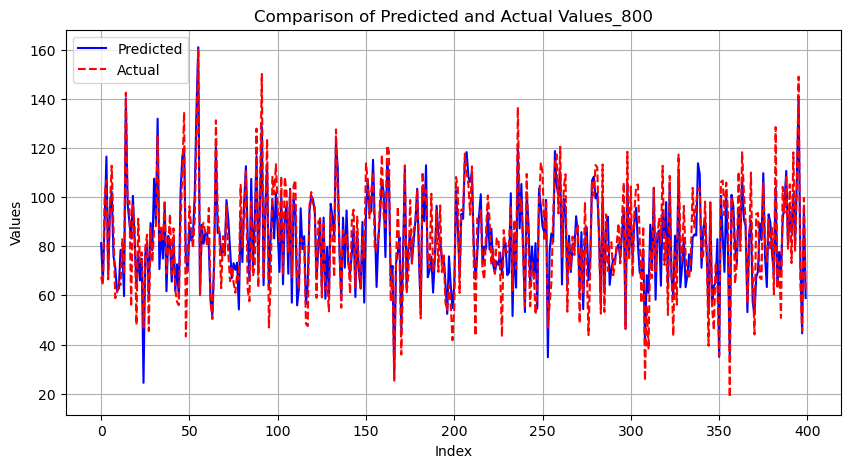

best_lamda: 1
Test Normalized Estimation Error: 0.399512926186974
Test NMSE Loss: 0.015155041613743455
Test Correlation: 0.8771953159105615
Test R2 Score: 0.7682473690608366
Objective Function Value: 416.55914776632414
Number of Samples: 950 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [4.99413272 4.99095983 5.01824478 ... 5.01079602 4.99894769 5.00150364]
Train Intercept: 83.21425166926268
Fold = 0, Alpha = 0, NEE: 0.551326393803956, NMSE: 0.0779611052571472, Correlation: 0.7056647651254944, R^2 Score: 0.1616514304897445,Objective Function Value: 56069.32226052903
Train Intercept: 83.00695300854389
Fold = 0, Alpha = 0.1, NEE: 0.3787590324757949, NMSE: 0.011476916674537006, Correlation: 0.9370757497474138, R^2 Score: 0.8765838857113378,Objective Function Value: 8297.302811175077
Train Intercept: 83.0064411259126
Fold = 0, Alpha = 0.3, NEE: 0.3792057980685722, NM

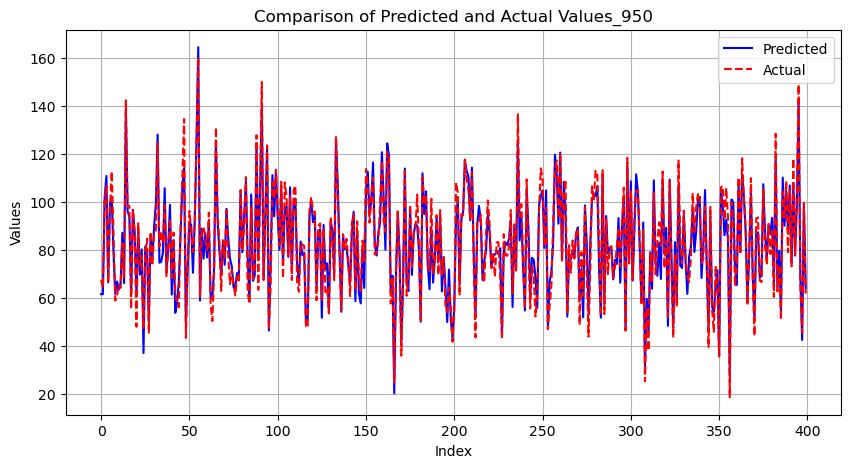

best_lamda: 0.1
Test Normalized Estimation Error: 0.29531046055307153
Test NMSE Loss: 0.0044589260039497635
Test Correlation: 0.9659833803774468
Test R2 Score: 0.9318135931978377
Objective Function Value: 48.95720026511188
Number of Samples: 1100 ---------------------------------------------------------------------------------------------------------------------------
Sample mean for each feature (across samples): [4.99229076 4.99583242 5.01768396 ... 5.00785591 4.99100698 4.99667398]
Train Intercept: 83.35946332842117
Fold = 0, Alpha = 0, NEE: 0.30413176587584473, NMSE: 0.011511120162977343, Correlation: 0.9190360743708335, R^2 Score: 0.8209348590825867,Objective Function Value: 9335.887305664037
Train Intercept: 83.31058774571545
Fold = 0, Alpha = 0.1, NEE: 0.2732199194133922, NMSE: 0.002246959542728461, Correlation: 0.9824827257219, R^2 Score: 0.9650466573662863,Objective Function Value: 1872.8288291779634
Train Intercept: 83.30553232873055
Fold = 0, Alpha = 0.3, NEE: 0.275164358368

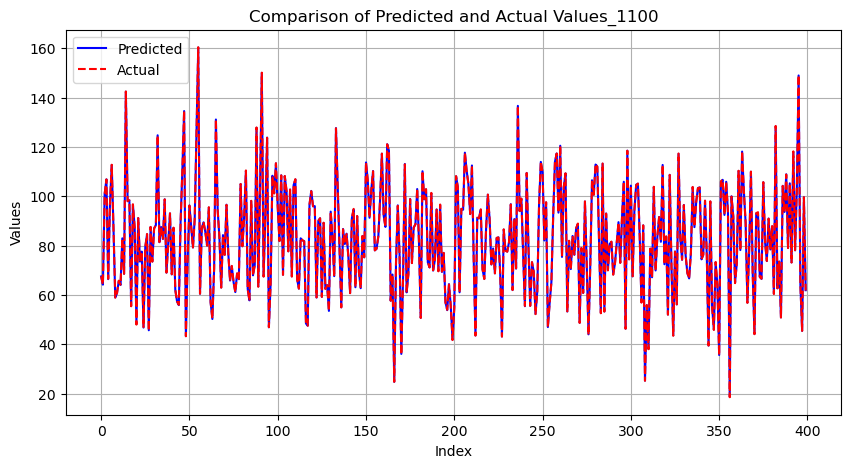

best_lamda: 0.1
Test Normalized Estimation Error: 0.25102828040269315
Test NMSE Loss: 1.4049397964904668e-06
Test Correlation: 0.9999903073812489
Test R2 Score: 0.9999785154998286
Objective Function Value: 52.044281998048085


In [11]:
for i,n_train in enumerate(n_train_all):
  print('Number of Samples:',n_train,'---------------------------------------------------------------------------------------------------------------------------')
  #Subset X_train and Y_train
  
  # Assuming X_train_Full and Y_train_Full are your full training dataset and labels
  # and n_train is the number of samples you want to select randomly

  # Generate random indices without replacement for training data
  #train_indices = np.random.choice(X_train_Full.shape[0], n_train, replace=False)

  # Select the random samples and corresponding labels
  X_train = X_train_Full[:n_train, :, :]
  Y_train = Y_train_Full[:n_train]

  # Assuming X_test_Full and Y_test_Full are your full testing dataset and labels
  # and n_test is the number of samples you want to select randomly

  # Generate random indices without replacement for testing data
  #test_indices = np.random.choice(X_test_Full.shape[0], n_test, replace=False)

  # Select the random samples and corresponding labels
  X_test = X_test_Full[:n_test, :, :]
  Y_test = Y_test_Full[:n_test]

  #Vectorize them!
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)

  # Initialize StandardScaler
  scaler = StandardScaler() #standard scalar only

  # Fit scaler on train data and transform train data
  X_train_scaled = scaler.fit_transform(X_train)
  # Transform test data using the scaler fitted on train data
  X_test_scaled = scaler.transform(X_test)

  #Reassign

  X_train = X_train_scaled
  X_test = X_test_scaled

  print("Sample mean for each feature (across samples):",scaler.mean_)


  alphas = [0,0.1,0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 2.5, 3, 5, 4,10,15,20,50,100]
  k_folds = 10
  lambda1, validation_normalized_estimation_errors, validation_nmse_losses, validation_correlations, validation_R2_scores, objective_function_values = KFoldCV_Vectorized(X_train, Y_train, B_tensored, alphas, k_folds, intercept= True)

  test_normalized_estimation_error, test_nmse_loss, test_correlation, test_R2_score,Y_test_predicted,p_star = TrainTest_Vectorized(X_train, Y_train, X_test, Y_test, B_tensored, lambda1,intercept= True)

  #print predicted
  print(Y_test_predicted)
  print(Y_test)

  # Plotting both arrays
  plt.figure(figsize=(10, 5))  # Set the figure size
  plt.plot(Y_test_predicted, label='Predicted', color='blue')  # Plot Y_test_predicted
  plt.plot(Y_test, label='Actual', color='red', linestyle='--')  # Plot Y_test with dashed line
  plt.title(f"Comparison of Predicted and Actual Values_{n_train}")  # Title of the plot
  plt.xlabel('Index')  # Label for the x-axis
  plt.ylabel('Values')  # Label for the y-axis
  #plt.yscale('log')
  plt.legend()  # Add a legend
  plt.grid(True)  # Add gridlines for better readability
  plt.show()  # Display the plot

  #Get current time and store in variable
  formatted_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
  pkl_file = f"/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Experimental Results/Vector_Base_Line/n_train_{n_train},intercept_0,n_test_{n_test}, p1_32, p2_32, d1_4, d2_4, S_2,ExecutionTime_{formatted_time}.pkl"

  print('best_lamda:',lambda1)
  print(f"Test Normalized Estimation Error: {test_normalized_estimation_error}")
  print(f"Test NMSE Loss: {test_nmse_loss}")
  print(f"Test Correlation: {test_correlation}")
  print(f"Test R2 Score: {test_R2_score}")
  print(f"Objective Function Value: {p_star}")

  #print("Validation NMSE Losses: ", validation_nmse_losses)
  #print("Validation Correlations: ", validation_correlations)
  #print("Validation R2 Scores: ", validation_R2_scores)

  with open(pkl_file, "wb") as file:
    dill.dump((p_star,lambda1, validation_normalized_estimation_errors, validation_nmse_losses, validation_correlations, validation_R2_scores, test_normalized_estimation_error, test_nmse_loss, test_correlation, test_R2_score), file)




